# PyStan

Like PyMC3, PyStan is a Python package for fitting rich Bayesian statistical models. It is a wrapper over Stan, well-respected software package for Bayesian inference.

Link: http://pystan.readthedocs.io

Unlike PyMC3, in which models are described with native code, PyStan is a Python wrapper over Stan.

## What is Stan?

<img src="https://raw.githubusercontent.com/stan-dev/logos/master/logo.png" width="12.5%">

A high-level statistical model specification language. i.e. a flexible DSL for probabilistic programming and inference.

It is also a library of algorithms for inference with the resulting models.

It has several cross-language interfaces: Python, R, Julia, Stata, Matlab, shell.

According to the Stan website (http://mc-stan.org):

<blockquote>
Stan® is a state-of-the-art platform for statistical modeling and high-performance statistical computation. Thousands of users rely on Stan for statistical modeling, data analysis, and prediction in the social, biological, and physical sciences, engineering, and business.
</blockquote>

You specify log density functions in Stan’s probabilistic programming language and get:

- full Bayesian statistical inference with MCMC sampling (NUTS, HMC)

- approximate Bayesian inference with variational inference (ADVI)

- penalized maximum likelihood estimation with optimization (L-BFGS)

- Stan’s math library provides differentiable probability functions & linear algebra (C++ autodiff).
</blockquote>

## Benefits of Stan

**Usability:** general purpose, clear modelling language, integration with several languages

**Scalability:** scales well to complex models with many parameters and lots of data

**Efficiency:** low memory usage

**Robustness:** stable numerical routines etc.

i.e. it saves someone time versus doing Bayesian inference from scratch.

### Similarities and differences: PyStan vs PyMC3

Like PyMC3, PyStan uses:
- the No U-Turn (NUTS) sampler (a variant of Hamiltonian Monte Carlo)
- offers variational inference (ADVI) for approximate Bayesian inference with complex models

Unlike PyMC3, PyStan:
- is GPL-licensed versus PyMC's BSD licence
- requires that a C++ compiler is available at runtime
- requires that Stan be installed, which can be challenging.

### Stan docs:

Amazing documentation: https://github.com/stan-dev/stan/releases/download/v2.16.0/stan-reference-2.16.0.pdf

In [ ]:
!conda install --yes -c conda-forge pystan

In [4]:
import pystan

### Eight schools example

An Educational Testing Service study to analyze the effect of coaching. Based on SAT-V scores in 8 high schools in the USA.

From Gelman et al., "Bayesian Data Analysis", 2003.

In [1]:
%%writefile ../Data/eight_schools.csv
School,Estimated Treatment Effect,Standard Error of Treatment Effect
A,28,15
B,8,10
C,-3,16
D,7,11
E,-1,9
F,1,11
G,18,10
H,12,18

Overwriting ../Data/eight_schools.csv


In [2]:
import pandas as pd
schools_data = pd.read_csv('../Data/eight_schools.csv', index_col=0)

In [10]:
schools_data

,Estimated Treatment Effect,Standard Error of Treatment Effect
School,,
A,28,15
B,8,10
C,-3,16
D,7,11
E,-1,9
F,1,11
G,18,10
H,12,18


Simple example:

In [27]:
schools_dat = {'J': 8,
               'y': schools_data['Estimated Treatment Effect'],
               'sigma': schools_data['Standard Error of Treatment Effect']}

In [28]:
sm = pystan.StanModel(file='8schools.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5f0bdf0403318871b8fe126f239ca318 NOW.


In [ ]:
# Use this to look at the file contents:
# %load 8schools.stan

In [29]:
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

The object `fit` returned from the `sampling` function stores samples from the posterior distribution. It has several methods:

In [30]:
[method for method in dir(fit) if not method.startswith('__')]

['_call_sampler',
 '_get_param_dims',
 '_get_param_dims_oi',
 '_get_param_fnames_oi',
 '_get_param_names',
 '_get_param_names_oi',
 '_update_param_oi',
 '_verify_has_samples',
 'constrain_pars',
 'constrained_param_names',
 'data',
 'date',
 'extract',
 'flatnames',
 'get_adaptation_info',
 'get_inits',
 'get_logposterior',
 'get_posterior_mean',
 'get_sampler_params',
 'get_seed',
 'get_stancode',
 'get_stanmodel',
 'grad_log_prob',
 'inits',
 'log_prob',
 'mode',
 'model_name',
 'model_pars',
 'par_dims',
 'plot',
 'sim',
 'stan_args',
 'stanmodel',
 'summary',
 'traceplot',
 'unconstrain_pars',
 'unconstrained_param_names']

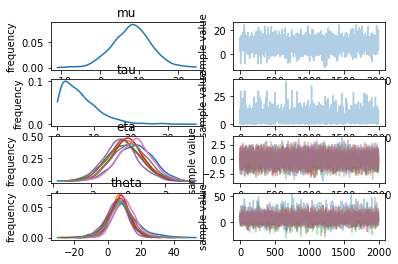

In [20]:
fit.traceplot()

In [37]:
fit.summary().keys()

odict_keys(['summary', 'c_summary', 'summary_rownames', 'summary_colnames', 'c_summary_rownames', 'c_summary_colnames'])

In [24]:
fit.model_pars

['mu', 'tau', 'eta', 'theta']

In [35]:
la = fit.extract()

In [36]:
la

OrderedDict([('mu',
              array([  5.39737558,  10.82374581,   9.77241557, ...,   8.47335861,
                      10.18040065,   7.75017381])),
             ('tau',
              array([ 18.39878787,   2.20580531,   5.17464699, ...,   2.38105103,
                       0.84783846,   3.34122508])),
             ('eta',
              array([[ 1.10923048,  0.67820296, -1.24586809, ..., -1.30040183,
                       0.21294116, -0.84060164],
                     [ 0.55472777,  0.43265566,  0.65412712, ...,  0.04314843,
                      -0.04040927,  0.25353965],
                     [ 0.70653597,  0.71265439, -0.60990254, ...,  0.85269469,
                       0.51287404,  1.27176531],
                     ..., 
                     [ 1.69354764,  1.1341684 ,  0.67697896, ...,  1.2051581 ,
                      -0.89252463, -0.22970897],
                     [ 0.92465094,  0.73717451, -0.14541624, ...,  0.82630178,
                      -1.48492716, -1.42379339],
   

### Exercise: try coding up one of the PyMC3 examples in PyStan

In [32]:
%%writefile custom_regression.stan
example_code = """
data {
    int<lower=0> N;
    vector[N] y;
    vector[N] x;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    alpha ~ normal(0,10);
    beta ~ normal(0,10);
    sigma ~ cauchy(0,5);
    y ~ normal(alpha + beta * x, sigma);
}
"""

Writing custom_regression.stan


## Interface between PyStan and Scikit-Learn

Richard Gerkin has created a simple scikit-learn `Estimator` class based on Stan / PyStan that allows you to use scikit-learn  to fit and check your Stan models:

https://github.com/rgerkin/pystan-sklearn

In [42]:
!git clone https://github.com/rgerkin/pystan-sklearn.git

Cloning into 'pystan-sklearn'...
remote: Counting objects: 7, done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.
Checking connectivity... done.


In [43]:
%cd pystan-sklearn/

/Users/schofield/Dropbox/PythonCharmers/Talks/BayesML PyCon AU 2017/pystan-sklearn


In [ ]:
# From example.py in that repo, simplified:
import numpy as np
from scipy.stats import norm
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from __init__ import StanEstimator


schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [ ]:
# First we have to make an estimator specific to our model.  
# For now, I don't have a good way of automatically implementing this
# in a general way based on the model code.  
class EightSchoolsEstimator(StanEstimator):
    # Implement a make_data method for the estimator.  
    # This tells the sklearn estimator what things to pass along
    # as data to the Stan model.  
    # This is trivial here but can be more complex for larger models.  
    def make_data(self,search_data=None):
        data = schools_dat
        if search_data:
            data.update({key:value[0] for key,value in search_data.items()})
        return data

    # Implement a predict_ method for the estimator.  
    # This tells the sklearn estimator how to make a prediction for one sample.  
    # This is based on the prediction for the mean theta above.   
    def predict_(self,X,j):
        print(X,j)
        theta_j = self.mu + self.tau * self.eta[j];
        return theta_j
    
    # Implement a score_ method for the estimator.  
    # This tells the sklearn estimator how to score one observed sample against
    # the prediction from the model.  
    # It is based on the fitted values of theta and sigma.     
    def score_(self,prediction,y):
        likelihoods = norm.pdf(y,prediction,self.sigma)
        return np.log(likelihoods).sum()

In [ ]:
# Initialize StanEstimator instance.  
estimator = EightSchoolsEstimator() 
# Compile the model code.
estimator.set_model(schools_code)   

# Search over these parameter values.  
search_data = {'mu':[0.3,1.0,3.0]} 
# Create a data dictionary for use with the estimator.  
# Note that this 'data' means different things in sklearn and Stan.  
data = estimator.make_data(search_data=search_data) 
# Set the data (set estimator attributes).  
estimator.set_data(data) 

# Fraction of data held out for testing.  
test_size = 0.1 
# A cross-validation class from sklearn.  
# Use the sample size variable from the Stan code here (e.g. "J").  
cv = ShuffleSplit(data['J'], test_size=test_size) 
# A grid search class over parameters from sklearn.
grid = GridSearchCV(estimator, search_data, cv=cv)   
    
# Set the y data.  
# Use the observed effect from the Stan code here (e.g. "y").  
y = data['y']
# Set the X data, i.e. the covariates.  
# In this example there is no X data so we just use an array of ones.   
X = np.ones((len(y),1))
#vstack((data['subject_ids'],data['test_ids'])).transpose()

# Fit the model over the parameter grid.  
grid.fit(X,y)

# Print the parameter values with the best scores (best predictive accuracy).  
print(grid.best_params_)        

## References

Many good tutorials (papers, videos) on both Stan and Bayesian inference in general are linked here:

http://mc-stan.org/users/documentation/tutorials.html

### Examples:

#### A quick-start intro to Stan for economists:

Jim Savage (2016): http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/IntroToStan_basics_workflow.ipynb

#### Modern Bayesian Tools for Time Series Analysis
Thomas P. Harte and R. Michael Weylandt (2016): http://tharte.github.io/mbt/